In [1]:
# turn of warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [4]:
overleaf_path = "/Users/veronica/Dropbox/Apps/Overleaf/EC_731_vcperez_overleaf/PSET_3"

In [5]:
# Load the Excel data
file_path = 'airlineEntry.xlsx'
df_airline_entry = pd.read_excel(file_path)

/opt/homebrew/Caskroom/miniforge/base/envs/python_env/lib/python3.10/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [6]:
df_airline_entry.head()

,cr,apCode1,apCode2,entry,lnPax,numEntrant,cfNumEntrant,entry2015,numEntrant2015,lnPax2015
0,AA,ATL,AUS,1,27.283047,3,3,0,2,27.640869
1,DL,ATL,AUS,1,27.283047,3,3,1,2,27.640869
2,UA,ATL,AUS,0,27.283047,3,4,0,2,27.640869
3,WN,ATL,AUS,1,27.283047,3,3,1,2,27.640869
4,AA,ATL,BNA,1,27.343918,3,3,0,2,27.641828


# Q1 Probit analysis:
(a) Run a probit regression of entry on $\ln P a x$ and cfNumEntrant. Also run OLS for this model. What do you find?

In [7]:
# drop rows with missings
df_regressions = df_airline_entry.dropna(subset=['entry', 'lnPax', 'cfNumEntrant'])

# create x and y vars
X = df_regressions[['lnPax', 'cfNumEntrant']]
X = sm.add_constant(X)  # add intercept
y = df_regressions['entry']

In [8]:
# OLS regression
ols_model = sm.OLS(y, X).fit()
print("OLS results:\n", ols_model.summary())

# Probit regression
probit_model = Probit(y, X).fit()
print("\nProbit results:\n", probit_model.summary())


OLS results:
                             OLS Regression Results                            
Dep. Variable:                  entry   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     109.3
Date:                Fri, 09 May 2025   Prob (F-statistic):           3.59e-47
Time:                        16:25:17   Log-Likelihood:                -3316.9
No. Observations:                4900   AIC:                             6640.
Df Residuals:                    4897   BIC:                             6659.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.7735      0.146

In [9]:
# extract summaries into dfs
ols_summary_df = pd.DataFrame({
    'Coef.': ols_model.params,
    'Std.Err.': ols_model.bse,
    'z': ols_model.tvalues,
    'p-value': ols_model.pvalues
})

probit_summary_df = pd.DataFrame({
    'Coef.': probit_model.params,
    'Std.Err.': probit_model.bse,
    'z': probit_model.tvalues,
    'p-value': probit_model.pvalues
})

# send to latex
ols_latex = ols_summary_df.to_latex(index=True, column_format='lcccc', escape=False)
probit_latex = probit_summary_df.to_latex(index=True, column_format='lcccc', escape=False)

ols_latex, probit_latex

('\\begin{tabular}{lcccc}\n\\toprule\n & Coef. & Std.Err. & z & p-value \\\\\n\\midrule\nconst & -1.773471 & 0.146440 & -12.110593 & 0.000000 \\\\\nlnPax & 0.083563 & 0.005661 & 14.762453 & 0.000000 \\\\\ncfNumEntrant & -0.036197 & 0.008528 & -4.244401 & 0.000022 \\\\\n\\bottomrule\n\\end{tabular}\n',
 '\\begin{tabular}{lcccc}\n\\toprule\n & Coef. & Std.Err. & z & p-value \\\\\n\\midrule\nconst & -6.094968 & 0.403727 & -15.096773 & 0.000000 \\\\\nlnPax & 0.224391 & 0.015580 & 14.402322 & 0.000000 \\\\\ncfNumEntrant & -0.099134 & 0.023029 & -4.304698 & 0.000017 \\\\\n\\bottomrule\n\\end{tabular}\n')

In [10]:
# save to a .tex file:
with open(overleaf_path + '/ols_results.tex', 'w') as f:
    f.write(ols_latex)

In [11]:
# save to a .tex file:
with open(overleaf_path + '/probit_results.tex', 'w') as f:
    f.write(probit_latex)

# Q2

In [12]:
# drop missings
df_airline_entry = df_airline_entry.dropna(subset=['cfNumEntrant', 'lnPax'])

# make dummies
df_airline_entry["AA"] = (df_airline_entry["cr"] == "AA").astype(int)
df_airline_entry["DL"] = (df_airline_entry["cr"] == "DL").astype(int)
df_airline_entry["UA"] = (df_airline_entry["cr"] == "UA").astype(int)


# compute a linear index
lin_index = (
    -2 
    + (-0.1) * df_airline_entry["cfNumEntrant"]
    + 0.1 * df_airline_entry["lnPax"]
    - 0.5 * df_airline_entry["AA"]
    - 0.5 * df_airline_entry["DL"]
    - 0.5 * df_airline_entry["UA"]
)

# calc probs i_m
df_airline_entry["P_im"] = norm.cdf(lin_index)

# stats
mean_prob = df_airline_entry["P_im"].mean()
std_prob = df_airline_entry["P_im"].std()

print("Mean P_im:", mean_prob)
print("Std Dev P_im:", std_prob)

Mean P_im: 0.5323740491178091
Std Dev P_im: 0.10031552026181245


In [13]:
df_airline_entry.head()

,cr,apCode1,apCode2,entry,lnPax,numEntrant,cfNumEntrant,entry2015,numEntrant2015,lnPax2015,AA,DL,UA,P_im
0,AA,ATL,AUS,1,27.283047,3,3,0,2,27.640869,1,0,0,0.471422
1,DL,ATL,AUS,1,27.283047,3,3,1,2,27.640869,0,1,0,0.471422
2,UA,ATL,AUS,0,27.283047,3,4,0,2,27.640869,0,0,1,0.431839
3,WN,ATL,AUS,1,27.283047,3,3,1,2,27.640869,0,0,0,0.665785
4,AA,ATL,BNA,1,27.343918,3,3,0,2,27.641828,1,0,0,0.473845


# Q3) 

In [14]:
# unique market identifier
df_airline_entry['market'] = df_airline_entry['apCode1'] + '_' + df_airline_entry['apCode2']


## Fixed point iteration jihye said no to but i assuem only for C)  not sure how to get the BNE without it
def compute_equilibrium_probs(beta, df, max_iter=100, tol=1e-6):
    """
    Compute BNE entry probabilities with vectorized operations
    """
    beta0, beta1, beta2, beta3, beta4, beta5 = beta
    df = df.copy()
    df['P'] = 0.5  # Initialize probabilities
    
    for _ in range(max_iter):
        df['E_N'] = df.groupby('market')['P'].transform('sum') - df['P']
        
        # Calculate linear predictor
        linear = (beta0 + beta1*df['E_N'] + beta2*df['lnPax'] + 
                 beta3*df['AA'] + beta4*df['DL'] + beta5*df['UA'])
        
        new_P = norm.cdf(linear)
        
        # Check convergence
        if np.max(np.abs(new_P - df['P'])) < tol:
            break
            
        df['P'] = new_P
    
    return df['P'].values

# def neg_ll

def log_likelihood(beta, df):
    # get P from BNE
    P = compute_equilibrium_probs(beta, df)
    Y = df['entry'].values
    ll = np.sum(Y * np.log(P + 1e-10)) + np.sum((1-Y) * np.log(1-P + 1e-10))
    return -ll  # Negative for minimization

# initialize betas use vlaues frm c -- initializing with zeros doesn't work ? sends everything to ZERO -> check why corner solution
initial_beta = np.array([-2.0, -0.1, 0.1, -0.5, -0.5, -0.5])

# L-BFGS-B optimizer 
result = minimize(log_likelihood, initial_beta, args=(df_airline_entry,), 
                  method='L-BFGS-B',
                  options={'maxiter': 100, 'disp': True})

# print
beta_opt = result.x
print("Optimal parameters:")
print(f"β0: {beta_opt[0]:.4f}")
print(f"β1: {beta_opt[1]:.4f}")
print(f"β2: {beta_opt[2]:.4f}")
print(f"β3 (AA): {beta_opt[3]:.4f}")
print(f"β4 (DL): {beta_opt[4]:.4f}")
print(f"β5 (UA): {beta_opt[5]:.4f}")

# Final probabilities
final_P = compute_equilibrium_probs(beta_opt, df_airline_entry)
print(f"\nMean entry probability: {np.mean(final_P):.4f}")
print(f"Std dev: {np.std(final_P):.4f}")
print(f"Min probability: {np.min(final_P):.4f}")
print(f"Max probability: {np.max(final_P):.4f}")

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33837D+03    |proj g|=  3.09890D+04

At iterate    1    f=  3.06277D+03    |proj g|=  2.85990D+02

At iterate    2    f=  3.06268D+03    |proj g|=  2.53011D+02


 This problem is unconstrained.



At iterate    3    f=  3.06245D+03    |proj g|=  4.25268D+02

At iterate    4    f=  3.06185D+03    |proj g|=  1.11454D+03

At iterate    5    f=  3.06032D+03    |proj g|=  2.19940D+03

At iterate    6    f=  3.05646D+03    |proj g|=  3.84555D+03

At iterate    7    f=  3.04737D+03    |proj g|=  6.05747D+03

At iterate    8    f=  3.02906D+03    |proj g|=  8.11417D+03

At iterate    9    f=  3.00343D+03    |proj g|=  7.91357D+03

At iterate   10    f=  2.98139D+03    |proj g|=  3.40405D+03

At iterate   11    f=  2.97732D+03    |proj g|=  2.49597D+02

At iterate   12    f=  2.97707D+03    |proj g|=  3.23484D+02

At iterate   13    f=  2.97701D+03    |proj g|=  4.16238D+02

At iterate   14    f=  2.97683D+03    |proj g|=  5.60246D+02

At iterate   15    f=  2.97632D+03    |proj g|=  8.10326D+02

At iterate   16    f=  2.97506D+03    |proj g|=  1.19818D+03

At iterate   17    f=  2.97246D+03    |proj g|=  1.64191D+03

At iterate   18    f=  2.96890D+03    |proj g|=  1.74291D+03

At iter

# Q3

## A)

In [ ]:
# ge tje su,s
sum_entered = df_airline_entry[df_airline_entry['entry']==1][['cfNumEntrant','lnPax']].sum()
sum_not_entered = df_airline_entry[df_airline_entry['entry']==0][['cfNumEntrant','lnPax']].sum()
n_entered = df_airline_entry['entry'].sum()
n_not_entered = len(df_airline_entry) - n_entered

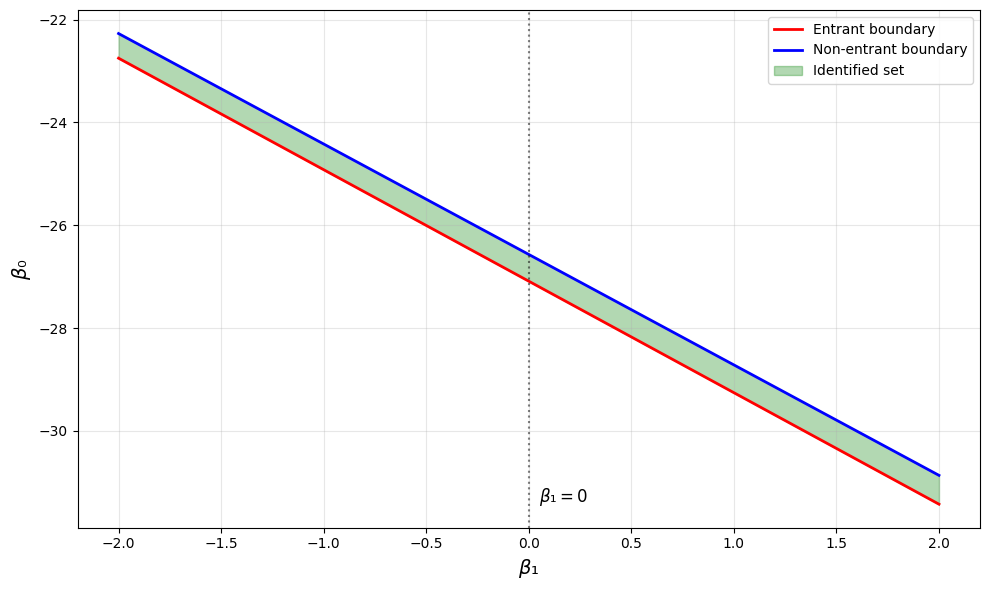

In [ ]:
# grid
beta1_grid = np.linspace(-2, 2, 100)

# boundary lines 
boundary_entrant = -(beta1_grid * sum_entered['cfNumEntrant'] + sum_entered['lnPax']) / n_entered
boundary_non_entrant = -(beta1_grid * sum_not_entered['cfNumEntrant'] + sum_not_entered['lnPax']) / n_not_entered

# PLOT
plt.figure(figsize=(10, 6))

# boundary lines
plt.plot(beta1_grid, boundary_entrant, 'r-', linewidth=2, 
         label='Entrant boundary')
plt.plot(beta1_grid, boundary_non_entrant, 'b-', linewidth=2,
         label='Non-entrant boundary')

# shade the identified set
plt.fill_between(beta1_grid, boundary_entrant, boundary_non_entrant, 
                 where=(boundary_entrant < boundary_non_entrant),
                 color='green', alpha=0.3, label='Identified set')

# extra stuff
plt.xlabel('$β₁$', fontsize=14)
plt.ylabel('$β₀$', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)

# Highlight b_1=0
plt.axvline(0, color='black', linestyle=':', alpha=0.5)
plt.text(0.05, plt.ylim()[0]+0.5, '$β₁=0$', fontsize=12)


plt.tight_layout()
plt.savefig(overleaf_path + "/pset_3_a_i.pdf")
plt.show()

## B)

In [39]:
df_airline_entry.head()

,cr,apCode1,apCode2,entry,lnPax,numEntrant,cfNumEntrant,entry2015,numEntrant2015,lnPax2015,AA,DL,UA,P_im,market,const,numEntrant2015_1,numEntrant2015_2,numEntrant2015_3,numEntrant2015_4
0,AA,ATL,AUS,1,27.283047,3,3,0,2,27.640869,1,0,0,0.471422,ATL_AUS,1,0,1,0,0
1,DL,ATL,AUS,1,27.283047,3,3,1,2,27.640869,0,1,0,0.471422,ATL_AUS,1,0,1,0,0
2,UA,ATL,AUS,0,27.283047,3,4,0,2,27.640869,0,0,1,0.431839,ATL_AUS,1,0,1,0,0
3,WN,ATL,AUS,1,27.283047,3,3,1,2,27.640869,0,0,0,0.665785,ATL_AUS,1,0,1,0,0
4,AA,ATL,BNA,1,27.343918,3,3,0,2,27.641828,1,0,0,0.473845,ATL_BNA,1,0,1,0,0


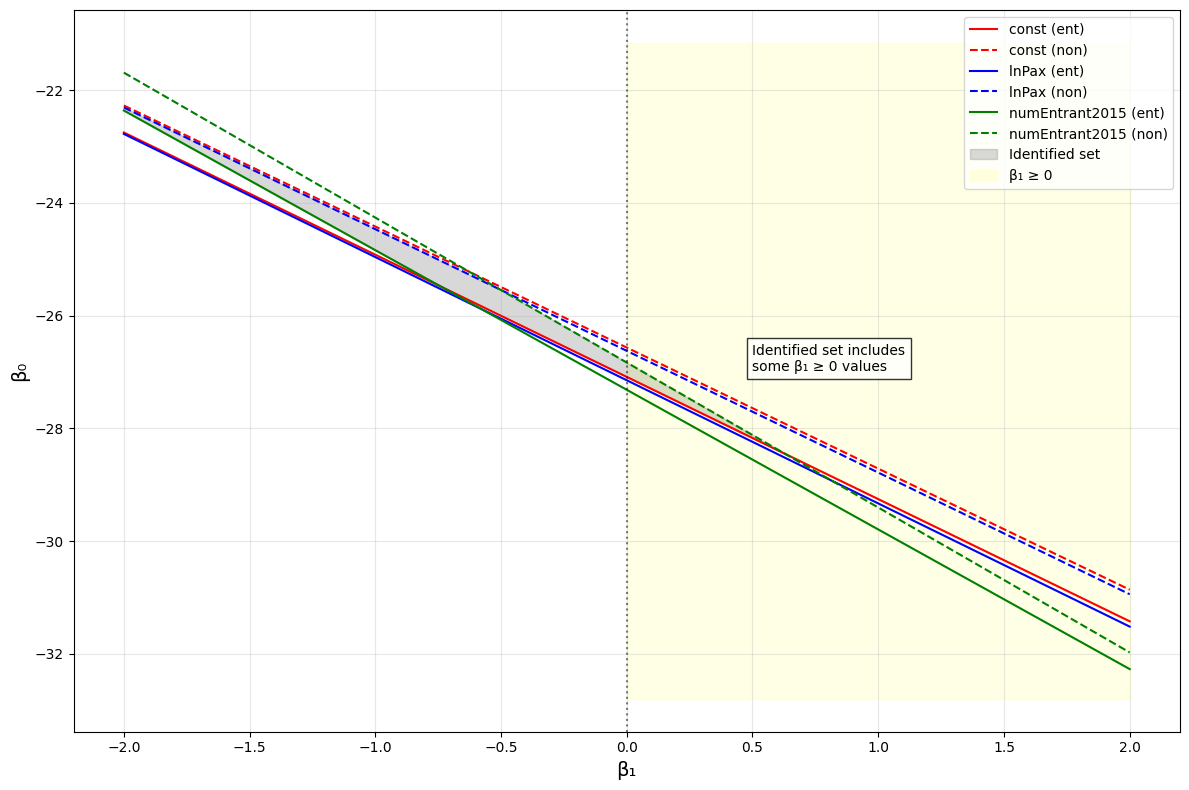

In [ ]:
# get conditional expectations for each instr
def compute_moments(df, z_vars):
    moments = {}
    for y in [0, 1]:
        subset = df[df['entry'] == y]
        for z in z_vars:
            # E[z], E[z*N], E[z*lnPax] ???
            moments[f'E_z{z}_Y{y}'] = subset[z].mean()
            moments[f'E_z{z}N_Y{y}'] = (subset[z] * subset['cfNumEntrant']).mean()
            moments[f'E_z{z}lnPax_Y{y}'] = (subset[z] * subset['lnPax']).mean()
    return moments

z_vars = ['const', 'lnPax', 'numEntrant2015']
df_airline_entry['const'] = 1  # constant to dataset
moments = compute_moments(df_airline_entry, z_vars)

# frid for b1
beta1_grid = np.linspace(-2, 2, 100)

# empty list for boundaries
boundaries = []

# iterate over z_vars and fill in vboundaries
for z in z_vars:
    # For entrants 
    slope_ent = moments[f'E_z{z}N_Y1'] / moments[f'E_z{z}_Y1']
    intercept_ent = moments[f'E_z{z}lnPax_Y1'] / moments[f'E_z{z}_Y1']
    boundary_ent = -beta1_grid * slope_ent - intercept_ent
    boundaries.append(('ent', z, boundary_ent))
    
    # For non-entrants
    slope_non = moments[f'E_z{z}N_Y0'] / moments[f'E_z{z}_Y0']
    intercept_non = moments[f'E_z{z}lnPax_Y0'] / moments[f'E_z{z}_Y0']
    boundary_non = -beta1_grid * slope_non - intercept_non
    boundaries.append(('non', z, boundary_non))

# plot

plt.figure(figsize=(12, 8))

# style per boundary
line_styles = {'ent': '-', 'non': '--'}
colors = {'const': 'red', 'lnPax': 'blue', 'numEntrant2015': 'green'}

for bound in boundaries:
    y_type, z_var, line = bound
    plt.plot(beta1_grid, line, 
             linestyle=line_styles[y_type],
             color=colors[z_var],
             label=f'{z_var} ({y_type})')

# identified set 
ent_max = np.maximum.reduce([b[2] for b in boundaries if b[0] == 'ent'])
non_min = np.minimum.reduce([b[2] for b in boundaries if b[0] == 'non'])

# shade identified set
plt.fill_between(beta1_grid, ent_max, non_min,
                 where=(ent_max < non_min),
                 color='gray', alpha=0.3, label='Identified set')

# Highlight beta_1 >= 0 
plt.axvline(0, color='black', linestyle=':', alpha=0.5)
plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], 
                 x1=0, x2=2,
                 color='yellow', alpha=0.1, label='β₁ ≥ 0')

# extra stuff
plt.xlabel('β₁', fontsize=14)
plt.ylabel('β₀', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)

# Add text annotation about β₁ ≥ 0
if np.any((beta1_grid >= 0) & (ent_max < non_min)):
    plt.text(0.5, np.mean(plt.ylim()), 
             'Identified set includes\nsome β₁ ≥ 0 values',
             bbox=dict(facecolor='white', alpha=0.8))
else:
    plt.text(0.5, np.mean(plt.ylim()), 
             'Identified set excludes\nall β₁ ≥ 0 values',
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig(overleaf_path + "/pset_3_b_i.pdf")
plt.show()

## C)

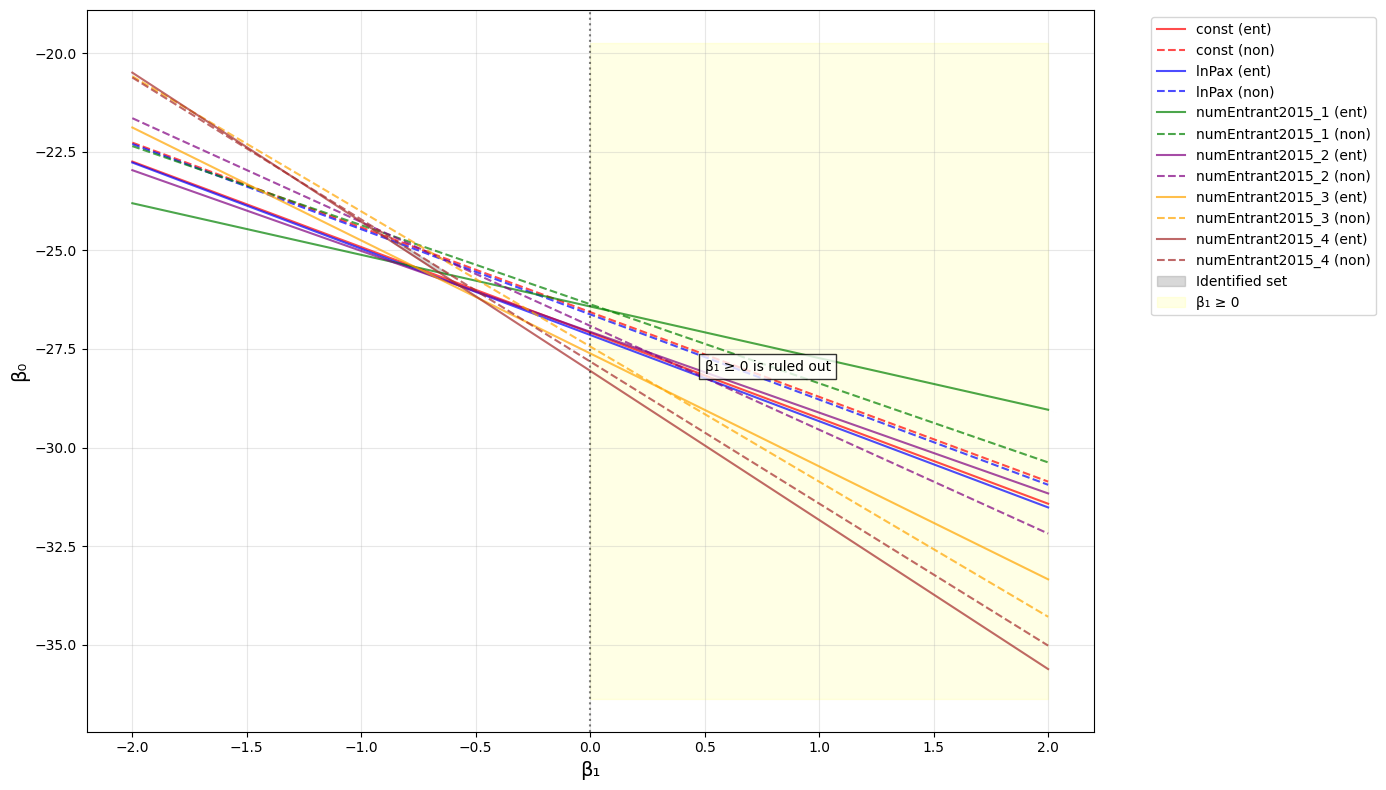

In [41]:
# Create dummy variables for numEntrant2015 levels
for i in range(1, 5):
    df_airline_entry[f'numEntrant2015_{i}'] = (df_airline_entry['numEntrant2015'] == i).astype(int)

# Define instrument set
z_vars = ['const', 'lnPax'] + [f'numEntrant2015_{i}' for i in range(1, 5)]

# Compute conditional expectations
def compute_moments(df, z_vars):
    moments = {}
    for y in [0, 1]:
        subset = df[df['entry'] == y]
        for z in z_vars:
            moments[f'E_{z}_Y{y}'] = subset[z].mean()
            moments[f'E_{z}N_Y{y}'] = (subset[z] * subset['cfNumEntrant']).mean()
            moments[f'E_{z}lnPax_Y{y}'] = (subset[z] * subset['lnPax']).mean()
    return moments

moments = compute_moments(df_airline_entry, z_vars)

# Create β1 grid
beta1_grid = np.linspace(-2, 2, 100)

# Compute all boundary lines (6 instruments × 2 inequalities = 12 boundaries)
boundaries = []
for z in z_vars:
    # Entrant boundary (Y=1): β0 > -β1*E[zN|1]/E[z|1] - E[z*lnPax|1]/E[z|1]
    slope_ent = moments[f'E_{z}N_Y1'] / moments[f'E_{z}_Y1']
    intercept_ent = moments[f'E_{z}lnPax_Y1'] / moments[f'E_{z}_Y1']
    boundary_ent = -beta1_grid * slope_ent - intercept_ent
    boundaries.append(('ent', z, boundary_ent))
    
    # Non-entrant boundary (Y=0): β0 < -β1*E[zN|0]/E[z|0] - E[z*lnPax|0]/E[z|0]
    slope_non = moments[f'E_{z}N_Y0'] / moments[f'E_{z}_Y0']
    intercept_non = moments[f'E_{z}lnPax_Y0'] / moments[f'E_{z}_Y0']
    boundary_non = -beta1_grid * slope_non - intercept_non
    boundaries.append(('non', z, boundary_non))

# Create plot
plt.figure(figsize=(14, 8))

# Plot settings
line_styles = {'ent': '-', 'non': '--'}
colors = {
    'const': 'red',
    'lnPax': 'blue',
    'numEntrant2015_1': 'green',
    'numEntrant2015_2': 'purple',
    'numEntrant2015_3': 'orange',
    'numEntrant2015_4': 'brown'
}

# Plot all boundaries
for bound in boundaries:
    y_type, z_var, line = bound
    plt.plot(beta1_grid, line, 
             linestyle=line_styles[y_type],
             color=colors[z_var],
             alpha=0.7,
             label=f'{z_var} ({y_type})')

# Compute identified set
ent_max = np.maximum.reduce([b[2] for b in boundaries if b[0] == 'ent'])
non_min = np.minimum.reduce([b[2] for b in boundaries if b[0] == 'non'])

# Shade the identified set
plt.fill_between(beta1_grid, ent_max, non_min,
                 where=(ent_max < non_min),
                 color='gray', alpha=0.3, label='Identified set')

# Highlight β₁ ≥ 0 region
plt.axvline(0, color='black', linestyle=':', alpha=0.5)
plt.fill_betweenx(y=[plt.ylim()[0], plt.ylim()[1]], 
                 x1=0, x2=2,
                 color='yellow', alpha=0.1, label='β₁ ≥ 0')

# Formatting
plt.xlabel('β₁', fontsize=14)
plt.ylabel('β₀', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Determine if β₁ ≥ 0 can be ruled out
beta1_pos = beta1_grid >= 0
overlap = np.any((beta1_pos) & (ent_max < non_min))

plt.text(0.5, np.mean(plt.ylim()), 
         f'β₁ ≥ 0 is {"not " if overlap else ""}ruled out',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig(overleaf_path + "/pset_3_c_i.pdf")
plt.show()